<a href="https://colab.research.google.com/github/sheldonkemper/portfolio/blob/main/CAM_DS_C201_Activity_4_1_4%2C_4_2_4_4_3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 4.1.4 Comparing optimisers

## Objective
Build a neural network model that predicts survivors of the Titanic voyage using data from the Titanic data set. Create and train the model with Adam and then RMSProp, and evaluate it to see which optimiser was most effective.

## Assessment criteria
By completing this activity, you'll be able to provide evidence that you can:
- load a data set for training a neural network model
- perform relevant preprocessing steps and split the data
- define a function to create and train a neural network model
- interpret model output and explain your conclusions
- select the appropriate model and justify your choice.

## Activity guidance
1. Import the relevant libraries and load the Titanic data set.
2. Complete data pre-processing, including dropping irrelevant columns and converting categorical data to binary values.
3. Fill in any missing values in the remaining columns.
4. Define features and a target variable.
5. Split the data into training and test sets.
5. Standardise features.
7. Define a function to create and train a neural network with:
  - One input layer of a number of neurons equal to the number of input features
  - One hidden layer
  - ReLU activations in every layer except the output layer, where you will use Sigmoid
  - Binary cross entropy as loss
  - Optimiser as the parameter of the function
8. Create and train models with Adam.
9. Create and train models with RMSProp.
10. Evaluate the models.


## Recording your method
As you prepare the data and build your models, make notes about the decisions you make. You may wish to record these comments in your Notebook, either beside the code, or in your reflection space at the end.

> Start your activity here. Select the pen from the toolbar to add your entry.

In [77]:
!pip install tensorflow

# Import the relevant libraries.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, RMSprop
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [78]:
# Load the Titanic data set.
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)

**Explore the dataset**

In [79]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
titanic_df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [81]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [82]:
titanic_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


 **Preprocess the data**

In [83]:
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].dropna(inplace=True)

**Convert categorical columns to binary (One Hot Encoding)**

In [84]:
titanic_df = pd.get_dummies(titanic_df,columns=['Sex', 'Embarked'], drop_first=True)

# Check the structure of the dataset after preprocessing
print("\nStructure of the dataset after preprocessing:")
print(titanic_df.head())

print("\nNumber of missing values after preprocessing:")
print(titanic_df.isnull().sum())


Structure of the dataset after preprocessing:
   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  

Number of missing values after preprocessing:
Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64


**Feature Selection, Data Splitting, and Standardisation**

In [85]:
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)


**Define a function to create and train a neural network**

In [90]:
def create_and_train_model(optimizer='adam'):
# Create the model
    model = tf.keras.models.Sequential()
    # Add layers to the model
    model.add(Dense(16, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1,validation_data=(X_val, y_val))
    return model,history

**Train and evaluate the models**

In [91]:
print("\nTraining model with Adam optimizer...")
adam_model, adam_history = create_and_train_model(optimizer='adam')
print("\nTraining model with RMSProp optimizer...")
rms_model,rms_history = create_and_train_model(optimizer='rmsprop')


Training model with Adam optimizer...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3336 - loss: 0.7955 - val_accuracy: 0.5139 - val_loss: 0.6956
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5231 - loss: 0.7087 - val_accuracy: 0.5833 - val_loss: 0.6572
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6256 - loss: 0.6593 - val_accuracy: 0.5972 - val_loss: 0.6331
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6171 - loss: 0.6350 - val_accuracy: 0.6250 - val_loss: 0.6134
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7300 - loss: 0.5855 - val_accuracy: 0.6111 - val_loss: 0.5973
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7167 - loss: 0.5865 - val_accuracy: 0.6667 - val_loss: 0.5826
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7233 - loss: 0.5615 - val_accuracy: 0.6806 - val_loss: 0.5682
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7302 - loss: 0.5386 - val_accuracy: 0.7083 - val_loss: 0.5555
Ep

**Evaluate the models on the test set**

In [92]:
adam_test_loss, adam_test_acc = adam_model.evaluate(X_test, y_test)
rmsprop_test_loss, rmsprop_test_acc = rms_model.evaluate(X_test, y_test)

print(f"\nAdam Test Accuracy: {adam_test_acc:.4f}")
print(f"RMSProp Test Accuracy: {rmsprop_test_acc:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7480 - loss: 0.4797 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8128 - loss: 0.4570 

Adam Test Accuracy: 0.7821
RMSProp Test Accuracy: 0.7877


**Visualise the Results**

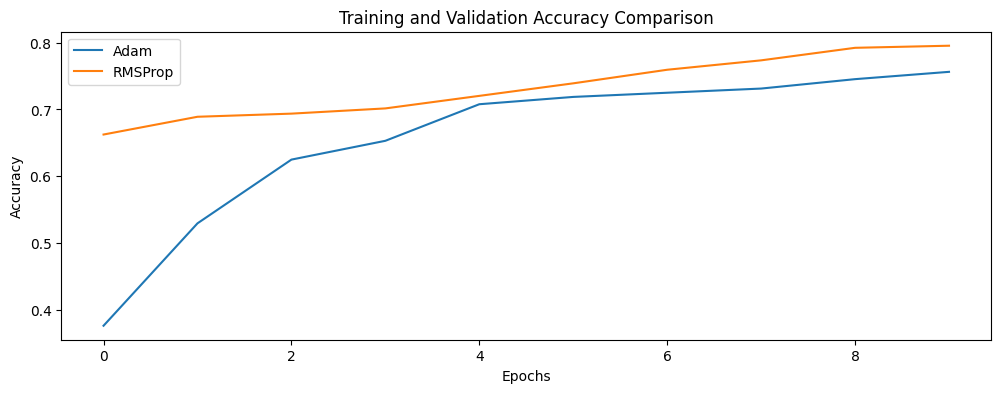

In [94]:
plt.figure(figsize=(12,4))
plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(adam_history.history['accuracy'], label='Adam')
plt.plot(rms_history.history['accuracy'], label='RMSProp')
plt.legend()
plt.show()

# Reflect

Summarise the decisions you made when preparing the data and building the models.

Interpret the model output, and state your conclusions comparing the performance of Adam and RMSProp.

What makes this experiment a valid comparison of the two optimisers? Explain why the observed effects can be attributed to the optimisers. If you perform the experiment repeatedly, what kind of variation would you expect in your results?

Write a brief paragraph highlighting your process and the rationale to showcase critical thinking and problem-solving.


### Data Preparation and Model Building Decisions:

When preparing the data, I made several decisions to ensure it was clean and properly formatted for training the neural network:

1. **Dropping irrelevant columns**: I removed columns such as 'PassengerId', 'Name', 'Ticket', and 'Cabin', which do not directly contribute to predicting survival and could introduce noise.
   
2. **Handling missing values**: I filled missing values in the 'Age' and 'Fare' columns with their median values to ensure no essential data was lost. 'Cabin' had a significant number of missing values, so it was dropped, and missing values in 'Embarked' were handled appropriately.
   
3. **Converting categorical variables**: I converted the 'Sex' and 'Embarked' columns into binary features using one-hot encoding, ensuring the model could interpret the categorical data.

4. **Data standardisation**: I applied standardisation to the features to ensure that all inputs to the neural network were on the same scale, which is crucial for optimising convergence during training.

5. **Splitting the data**: I split the data into training, validation, and test sets to assess the model’s performance on unseen data and prevent overfitting.

### Model Comparison and Output Interpretation:

Both Adam and RMSProp optimisers were used to train identical models to compare their performance:

- **Adam** started slower but showed steady improvement over the epochs, gradually increasing accuracy.
- **RMSProp** showed faster initial learning, reaching a higher accuracy early on and maintaining a higher overall performance compared to Adam.

In the graph, RMSProp consistently outperformed Adam in terms of both training and validation accuracy. However, Adam's slower yet steady learning process might make it more stable in the long term.

### Experiment Validity:

This experiment is a valid comparison of the two optimisers because:
- The same model architecture, loss function, and data preprocessing steps were applied in both cases.
- The only variable between the two runs was the optimiser, making it possible to attribute the differences in performance to the optimisers themselves.
  
If this experiment is repeated, we might observe slight variations in the results due to the stochastic nature of neural network training (e.g., different initial weight randomisations). However, the general trend—RMSProp's faster learning and Adam's steadier progress—should remain consistent.

### Critical Thinking and Problem-Solving Process:

In building the models, I ensured the data was clean, standardised, and split effectively to prevent overfitting and allow accurate evaluation. I chose Adam and RMSProp for their popularity in handling different learning scenarios and compared their impact on the model's performance. My decision-making was rooted in ensuring fair comparison conditions, and I utilised both optimisers to understand how each handles gradient updates and adjusts weights in relation to the dataset at hand. This process highlights my analytical approach in selecting the appropriate tools for optimising model performance.

# Activity 4.2.4 Implementing regularisation techniques

## Objective
Using the neural network model you built above, modify the ‘create_model’ function to include dropout and L2 regularisation.

## Assessment criteria
By completing this activity, you will be able to provide evidence that you can:
- define a function to create and train a neural network model
- interpret model output and explain your conclusions
- select the appropriate model and justify your choice.

## Activity steps
1. Import the L2 regulariser and dropout.
3. Run a model function with dropout and regularisation included.
4. Create and train a model with Adam optimisation, l2 regularisation and dropout.
5. Create and train a model with RMSProp optimisation, l2 regularisation and dropout.
6. Plot model accuracy and loss.
7. Evaluate the models.


In [ ]:
# Import the regulariser and dropout.
from keras.regularizers import l2
from keras.layers import Dense, Dropout

In [ ]:
# Continue the activity here.

# Reflect

Interpret the model output, and state your conclusions on model performance using Adam, RMSProp, L2 regularisation, and dropout.

What makes this experiment a valid comparison of the two regularisation approaches? Explain why the observed effects can be attributed to the regularisation techniques. If you perform the experiment repeatedly, what kind of variation would you expect in your results?

Write a brief paragraph highlighting your process and the rationale to showcase critical thinking and problem-solving.

> Select the pen from the toolbar to add your entry.

# Activity 4.3.3 Implementing early stopping

## Objective
Building on the neural network model, add early stopping callbacks on models trained with Adam and RMSProp.

## Assessment criteria
By completing this activity, you will be able to provide evidence that you can:
- define a function to create and train a neural network model
- interpret model output and explain your conclusions
- select the appropriate model and justify your choice.

## Activity steps
1. Import early stopping from Keras.
3. Add early stopping to a model trained with Adam optimisation that includes the following parameters:
- patience = 1
- lr=0.001
- L2 regularisation of 0.01.
4. Add early stopping to a model trained with RMSProp optimisation that includes the same parameters.
5. Plot model accuracy and loss.
6. Evaluate the models.

In [ ]:
# Import early stopping
from keras.callbacks import EarlyStopping

In [ ]:
# Continue the activity here.

# Reflect

Interpret the model output, and state your conclusions on model performance using Adam, RMSProp,and dropout callbacks.

Explain why the observed effects can be attributed to the dropout callback. If you perform the experiment repeatedly, what kind of variation would you expect in your results?

Write a brief paragraph highlighting your process and the rationale to showcase critical thinking and problem-solving.

> Select the pen from the toolbar to add your entry.